In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics,preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

In [265]:
df=pd.read_csv(r"C:\Users\USER\ML_PROJECT\stroke\strokedataset.csv")

In [266]:
df=df.drop('id',axis=1)

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [268]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


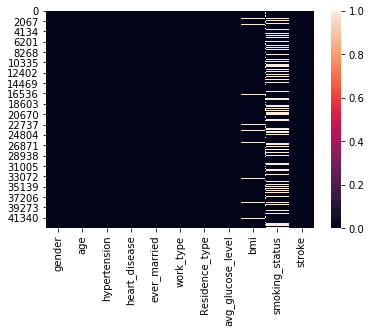

In [269]:
sns.heatmap(df.isnull())

In [270]:
df.dropna(axis=0,inplace=True)

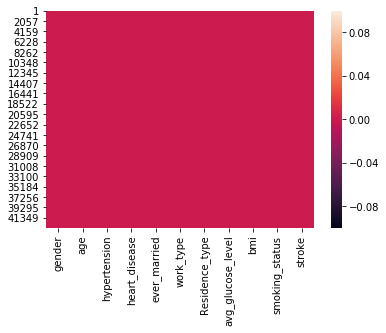

In [271]:
sns.heatmap(df.isnull())

In [272]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
6,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [273]:
columns=df.columns

In [274]:
for i in columns:
    print("--------------------------------")
    print(df[i].value_counts())

--------------------------------
Female    17852
Male      11213
Other         7
Name: gender, dtype: int64
--------------------------------
51.0    586
52.0    560
47.0    549
50.0    544
57.0    543
       ... 
14.0    187
13.0    157
12.0    143
11.0    107
10.0     78
Name: age, Length: 73, dtype: int64
--------------------------------
0    25831
1     3241
Name: hypertension, dtype: int64
--------------------------------
0    27556
1     1516
Name: heart_disease, dtype: int64
--------------------------------
Yes    21690
No      7382
Name: ever_married, dtype: int64
--------------------------------
Private          18954
Self-employed     5204
Govt_job          4196
children           617
Never_worked       101
Name: work_type, dtype: int64
--------------------------------
Urban    14595
Rural    14477
Name: Residence_type, dtype: int64
--------------------------------
87.15     15
73.00     14
83.92     14
91.57     14
96.06     13
          ..
205.97     1
123.35     1
126.01   

In [275]:
df.drop(df[df["gender"]=="Other"].index,inplace=True)

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29065 entries, 1 to 43399
Data columns (total 11 columns):
gender               29065 non-null object
age                  29065 non-null float64
hypertension         29065 non-null int64
heart_disease        29065 non-null int64
ever_married         29065 non-null object
work_type            29065 non-null object
Residence_type       29065 non-null object
avg_glucose_level    29065 non-null float64
bmi                  29065 non-null float64
smoking_status       29065 non-null object
stroke               29065 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 2.7+ MB


In [277]:
for i in columns:
    print("--------------------------------")
    print(df[i].value_counts())

--------------------------------
Female    17852
Male      11213
Name: gender, dtype: int64
--------------------------------
51.0    585
52.0    560
47.0    549
50.0    544
57.0    543
       ... 
14.0    187
13.0    157
12.0    143
11.0    106
10.0     77
Name: age, Length: 73, dtype: int64
--------------------------------
0    25824
1     3241
Name: hypertension, dtype: int64
--------------------------------
0    27549
1     1516
Name: heart_disease, dtype: int64
--------------------------------
Yes    21687
No      7378
Name: ever_married, dtype: int64
--------------------------------
Private          18950
Self-employed     5204
Govt_job          4195
children           615
Never_worked       101
Name: work_type, dtype: int64
--------------------------------
Urban    14592
Rural    14473
Name: Residence_type, dtype: int64
--------------------------------
87.15     15
73.00     14
91.57     14
83.92     14
93.58     13
          ..
205.97     1
123.35     1
126.01     1
190.39     1

In [278]:
cat_df=df.select_dtypes(include="object")

In [279]:
cat_df

,gender,ever_married,work_type,Residence_type,smoking_status
1,Male,Yes,Private,Urban,never smoked
3,Female,Yes,Private,Rural,formerly smoked
6,Female,Yes,Private,Urban,formerly smoked
7,Female,Yes,Self-employed,Rural,never smoked
8,Female,Yes,Private,Rural,smokes
...,...,...,...,...,...
43395,Female,No,children,Urban,never smoked
43396,Female,Yes,Govt_job,Urban,formerly smoked
43397,Female,Yes,Private,Urban,formerly smoked
43398,Male,Yes,Private,Urban,never smoked


In [280]:
encoders={}
for i in cat_df:
    encoders[i]=preprocessing.LabelEncoder()
    df[i]=encoders[i].fit_transform(df[i])

In [281]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,1,58.0,1,0,1,2,1,87.96,39.2,1,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0,0
6,0,52.0,0,0,1,2,1,77.59,17.7,0,0
7,0,75.0,0,1,1,3,0,243.53,27.0,1,0
8,0,32.0,0,0,1,2,0,77.67,32.3,2,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,0,10.0,0,0,0,4,1,58.64,20.4,1,0
43396,0,56.0,0,0,1,0,1,213.61,55.4,0,0
43397,0,82.0,1,0,1,2,1,91.94,28.9,0,0
43398,1,40.0,0,0,1,2,1,99.16,33.2,1,0


In [282]:
y=df['stroke']
x=df.drop("stroke",axis=1)

In [283]:
y.value_counts()

0    28517
1      548
Name: stroke, dtype: int64

In [284]:
smote=SMOTE(sampling_strategy="minority")
x_sm,y_sm=smote.fit_resample(x,y)


In [285]:
y_sm.value_counts()

1    28517
0    28517
Name: stroke, dtype: int64

In [286]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm ,stratify=y_sm)

In [287]:
forest=RandomForestClassifier(n_estimators=200,criterion="gini")

In [288]:
forest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [289]:
pred_f=forest.predict(x_test)

In [290]:
print(classification_report(y_test,pred_f))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      7129
           1       0.96      0.98      0.97      7130

    accuracy                           0.97     14259
   macro avg       0.97      0.97      0.97     14259
weighted avg       0.97      0.97      0.97     14259



In [291]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_f))

Accuracy: 0.971807279612876


In [292]:
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
pred_l=logistic.predict(x_test)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [293]:
print(classification_report(y_test,pred_l))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      7129
           1       0.78      0.81      0.79      7130

    accuracy                           0.79     14259
   macro avg       0.79      0.79      0.79     14259
weighted avg       0.79      0.79      0.79     14259



In [294]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_l))

Accuracy: 0.7907987937443018


In [247]:
svm1=svm.SVC(gamma="auto",C=10,kernel="rbf",probability=True)


In [248]:
svm1.fit(x_train,y_train)
pred_s=svm1.predict(x_test)

In [249]:
print(classification_report(y_test,pred_s))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      7126
           1       0.95      0.99      0.97      7133

    accuracy                           0.97     14259
   macro avg       0.97      0.97      0.97     14259
weighted avg       0.97      0.97      0.97     14259



In [250]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_s))

Accuracy: 0.9716670173223929


In [251]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred_n=gnb.predict(x_test)

In [252]:
print(confusion_matrix(y_test,pred_n))
print(classification_report(y_test,pred_n))
print("Accuracy:",metrics.accuracy_score(y_test,pred_n))

[[5297 1829]
 [1335 5798]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      7126
           1       0.76      0.81      0.79      7133

    accuracy                           0.78     14259
   macro avg       0.78      0.78      0.78     14259
weighted avg       0.78      0.78      0.78     14259

Accuracy: 0.7781050564555719


In [253]:
classifier=AdaBoostClassifier(DecisionTreeClassifier(criterion="gini"),algorithm="SAMME.R",
                         n_estimators=200)
classifier.fit(x_train,y_train)
pred_a=classifier.predict(x_test)

In [254]:
print(confusion_matrix(y_test,pred_a))
print(classification_report(y_test,pred_a))
print("Accuracy:",metrics.accuracy_score(y_test, pred_a))

[[6724  402]
 [ 252 6881]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7126
           1       0.94      0.96      0.95      7133

    accuracy                           0.95     14259
   macro avg       0.95      0.95      0.95     14259
weighted avg       0.95      0.95      0.95     14259

Accuracy: 0.9541342310119925


In [255]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = forest.predict_proba(x_test)
lr_probs = logistic.predict_proba(x_test)
dt_probs = classifier.predict_proba(x_test)
nb_probs=gnb.predict_proba(x_test)
sv_probs=svm1.predict_proba(x_test)

In [256]:
rf_probs=rf_probs[:, 1]
lr_probs=lr_probs[:, 1]
dt_probs=dt_probs[:, 1]
nb_probs=nb_probs[:, 1]
sv_probs=sv_probs[:, 1]

In [257]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
sv_auc = roc_auc_score(y_test, sv_probs)


In [258]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('logistic regression: AUROC = %.3f' % (lr_auc))
print('decision tree: AUROC = %.3f' % (dt_auc))
print('Naive bayes: AUROC = %.3f' % (nb_auc))
print('svm: AUROC = %.3f' % (sv_auc))


Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.996
logistic regression: AUROC = 0.877
decision tree: AUROC = 0.954
Naive bayes: AUROC = 0.854
svm: AUROC = 0.994


In [259]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
sv_fpr, sv_tpr, _ = roc_curve(y_test, sv_probs)

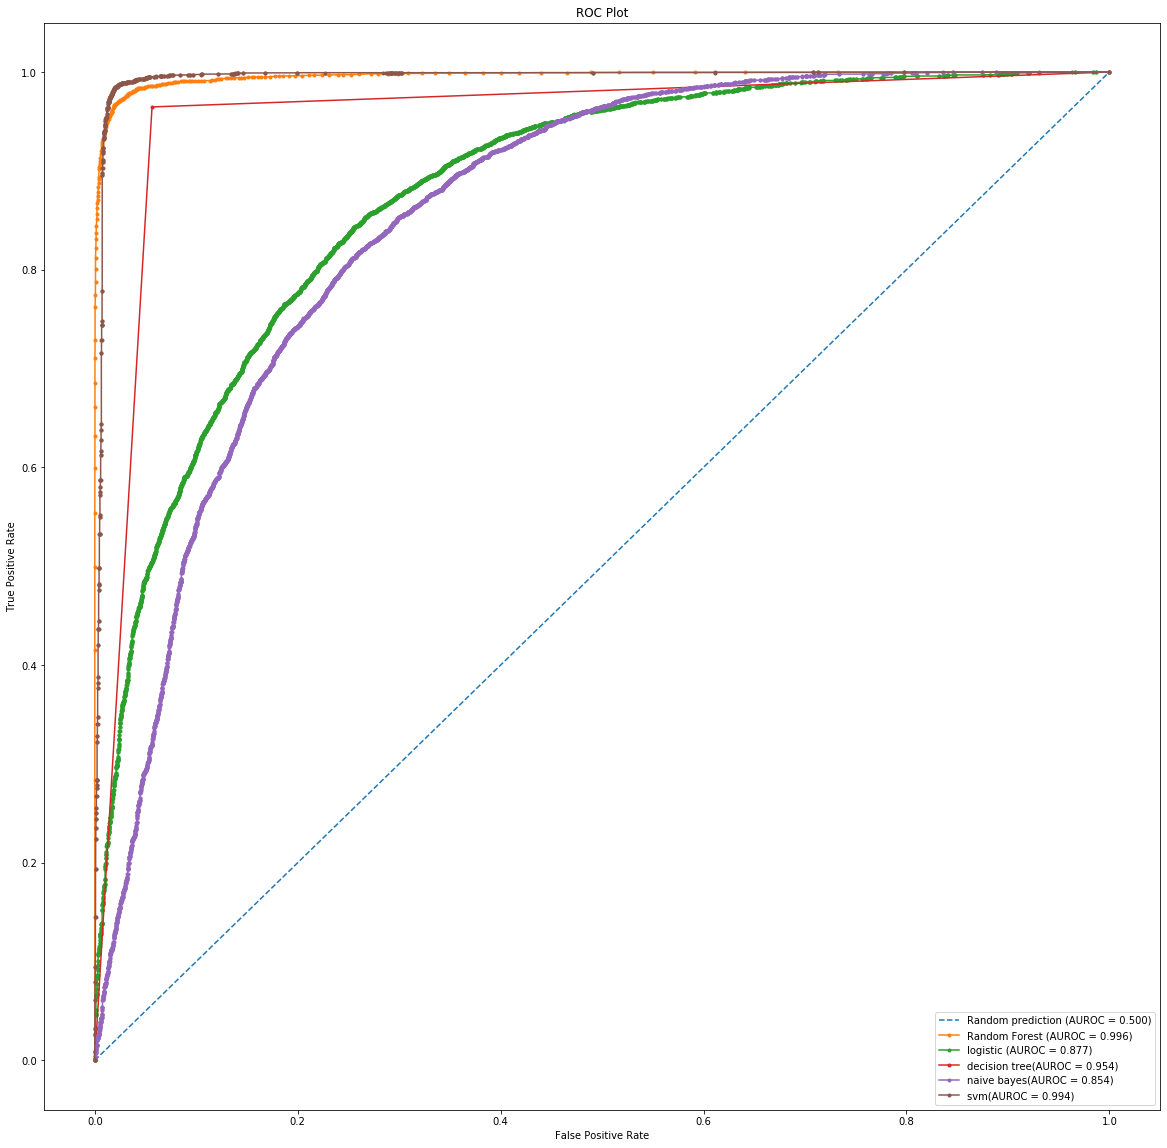

In [260]:
plt.figure(figsize=(20,20))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='logistic (AUROC = %0.3f)' % lr_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='decision tree(AUROC = %0.3f)' % dt_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='naive bayes(AUROC = %0.3f)' % nb_auc)
plt.plot(sv_fpr, sv_tpr, marker='.', label='svm(AUROC = %0.3f)' % sv_auc)
# Title
plt.title('ROC Plot')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [261]:
clf=GridSearchCV(RandomForestClassifier(),{
    "n_estimators":[10,100,200],
    "criterion":["gini","entropy"]
},cv=5,return_train_score=False)
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 100, 200]})

In [262]:
df5=pd.DataFrame(clf.cv_results_)

In [263]:
df5

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.440890,0.019628,0.019069,0.001958,gini,10,"{'criterion': 'gini', 'n_estimators': 10}",0.966102,0.962478,0.957686,0.959673,0.960725,0.961333,0.002845,6
1,4.521244,0.103932,0.202614,0.004116,gini,100,"{'criterion': 'gini', 'n_estimators': 100}",0.969608,0.966920,0.964348,0.966102,0.967621,0.966920,0.001732,1
2,9.355003,0.197121,0.437961,0.024886,gini,200,"{'criterion': 'gini', 'n_estimators': 200}",0.968790,0.966569,0.963998,0.966452,0.968089,0.966780,0.001652,2
3,0.657032,0.048836,0.028973,0.003821,entropy,10,"{'criterion': 'entropy', 'n_estimators': 10}",0.965985,0.963881,0.960140,0.958036,0.962478,0.962104,0.002784,5
4,6.134948,0.274765,0.214995,0.019950,entropy,100,"{'criterion': 'entropy', 'n_estimators': 100}",0.969375,0.967154,0.964115,0.965985,0.965985,0.966523,0.001727,3
5,12.853358,0.572441,0.458973,0.030402,entropy,200,"{'criterion': 'entropy', 'n_estimators': 200}",0.969608,0.966102,0.963530,0.965167,0.966335,0.966148,0.001991,4
